In [1]:
library(CellChat)

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: igraph


Attaching package: ‘igraph’


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Loading required package: ggplot2



In [2]:
suppressMessages({
    library(plyr)
    library(CellChat)
    library(patchwork)
    library(SeuratDisk)
    library(Seurat)
    library(SingleCellExperiment)
    library(ggalluvial)
    library(repr)
    library(ggplot2)
    library(gplots)
    library(RColorBrewer)
    library(gplots)
    library(tidyr)
 })
options(stringsAsFactors = FALSE)

In [3]:
library(ComplexHeatmap)

Loading required package: grid

ComplexHeatmap version 2.6.2
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))




In [4]:
sessionInfo()

R version 4.0.5 (2021-03-31)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Red Hat Enterprise Linux 8.5 (Ootpa)

Matrix products: default
BLAS/LAPACK: /rds/general/user/snb20/home/anaconda3/envs/r405_cellchat/lib/libopenblasp-r0.3.18.so

locale:
 [1] LC_CTYPE=en_GB.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_GB.UTF-8        LC_COLLATE=en_GB.UTF-8    
 [5] LC_MONETARY=en_GB.UTF-8    LC_MESSAGES=en_GB.UTF-8   
 [7] LC_PAPER=en_GB.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_GB.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
 [1] grid      stats4    parallel  stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] ComplexHeatmap_2.6.2        tidyr_1.1.4                
 [3] RColorBrewer_1.1-2          gplots_3.1.1               
 [5] repr_1.1.4                  ggalluvial_0.12.3          
 [7] SingleCellExperiment_1.12.0 SummarizedEx

In [5]:
'%!in%' <- function(x,y)!('%in%'(x,y))

In [6]:
options(future.globals.maxSize = 20000 * 1024 ^ 2)

In [7]:
OUTDIR <- "/rds/general/user/snb20/home/3_COVID19/GitHub_Notebooks/CellChat/"
dir.create(OUTDIR, showWarnings = FALSE)
setwd(OUTDIR)
getwd()

[1] "/rds/general/user/snb20/home/3_COVID19/GitHub_Notebooks/CellChat"

In [8]:
#INDIR <- "/rds/general/user/snb20/home/3_COVID19/GitHub_Notebooks/CellChat/"

In [9]:
cellchat.healthy <- readRDS("/rds/general/user/snb20/projects/cardiac_single_cell_biology/live/sanger_covid19_snRNAseq/lung/lung_v2/object_anno/cellchat_global_healthy_no_abundance.rds")
cellchat.covid <- readRDS("/rds/general/user/snb20/projects/cardiac_single_cell_biology/live/sanger_covid19_snRNAseq/lung/lung_v2/object_anno/cellchat_global_covid_no_abundance.rds")

In [10]:
netVisual_bubble_2 <- function(object, sources.use = NULL, targets.use = NULL, signaling = NULL, pairLR.use = NULL, color.heatmap = c("Spectral","viridis","Reds"), n.colors = 10, direction = -1, thresh = 0.05,
                             comparison = NULL, group = NULL, remove.isolate = FALSE, max.dataset = NULL, min.dataset = NULL,
                             min.quantile = 0, max.quantile = 1, line.on = TRUE, line.size = 0.2, color.text.use = TRUE, color.text = NULL,
                             title.name = NULL, font.size = 10, font.size.title = 10, show.legend = TRUE,
                             grid.on = TRUE, color.grid = "grey90", angle.x = 90, vjust.x = NULL, hjust.x = NULL,angle.y = 0, vjust.y = NULL, hjust.y = NULL,
                             return.data = FALSE,text_size.x=8,text_size.y=8,pch=16,cex=1,order=NULL){
  color.heatmap <- match.arg(color.heatmap)
  if (is.list(object@net[[1]])) {
    message("Comparing communications on a merged object \n")
  } else {
    message("Comparing communications on a single object \n")
  }
  if (is.null(vjust.x) | is.null(hjust.x)) {
    angle=c(0, 45, 90)
    hjust=c(0, 1, 1)
    vjust=c(0, 1, 0.5)
    vjust.x = vjust[angle == angle.x]
    hjust.x = hjust[angle == angle.x]
  }
  if (length(color.heatmap) == 1) {
    color.use <- tryCatch({
      RColorBrewer::brewer.pal(n = n.colors, name = color.heatmap)
    }, error = function(e) {
      scales::viridis_pal(option = color.heatmap, direction = -1)(n.colors)
    })
  } else {
    color.use <- color.heatmap
  }
  if (direction == -1) {
    color.use <- rev(color.use)
  }

  if (is.null(comparison)) {
    cells.level <- levels(object@idents)
    if (is.numeric(sources.use)) {
      sources.use <- cells.level[sources.use]
    }
    if (is.numeric(targets.use)) {
      targets.use <- cells.level[targets.use]
    }
    df.net <- subsetCommunication(object, slot.name = "net",
                                  sources.use = sources.use, targets.use = targets.use,
                                  signaling = signaling,
                                  pairLR.use = pairLR.use,
                                  thresh = thresh)
    df.net$source.target <- paste(df.net$source, df.net$target, sep = " -> ")
    source.target <- paste(rep(sources.use, each = length(targets.use)), targets.use, sep = " -> ")
    source.target.isolate <- setdiff(source.target, unique(df.net$source.target))
    if (length(source.target.isolate) > 0) {
      df.net.isolate <- as.data.frame(matrix(NA, nrow = length(source.target.isolate), ncol = ncol(df.net)))
      colnames(df.net.isolate) <- colnames(df.net)
      df.net.isolate$source.target <- source.target.isolate
      df.net.isolate$interaction_name_2 <- df.net$interaction_name_2[1]
      df.net.isolate$pval <- 1
      a <- stringr::str_split(df.net.isolate$source.target, " -> ", simplify = T)
      df.net.isolate$source <- as.character(a[, 1])
      df.net.isolate$target <- as.character(a[, 2])
      df.net <- rbind(df.net, df.net.isolate)
    }

    df.net$pval[df.net$pval > 0.05] = 1
    df.net$pval[df.net$pval > 0.01 & df.net$pval <= 0.05] = 2
    df.net$pval[df.net$pval <= 0.01] = 3
    df.net$prob[df.net$prob == 0] <- NA
    df.net$prob.original <- df.net$prob
    df.net$prob <- -1/log(df.net$prob)

    idx1 <- which(is.infinite(df.net$prob) | df.net$prob < 0)
    if (sum(idx1) > 0) {
      values.assign <- seq(max(df.net$prob, na.rm = T)*1.1, max(df.net$prob, na.rm = T)*1.5, length.out = length(idx1))
      position <- sort(prob.original[idx1], index.return = TRUE)$ix
      df.net$prob[idx1] <- values.assign[match(1:length(idx1), position)]
    }
    # rownames(df.net) <- df.net$interaction_name_2

    df.net$source <- factor(df.net$source, levels = cells.level[cells.level %in% unique(df.net$source)])
    df.net$target <- factor(df.net$target, levels = cells.level[cells.level %in% unique(df.net$target)])
    group.names <- paste(rep(levels(df.net$source), each = length(levels(df.net$target))), levels(df.net$target), sep = " -> ")

    df.net$interaction_name_2 <- as.character(df.net$interaction_name_2)
    df.net <- with(df.net, df.net[order(interaction_name_2),])
    df.net$interaction_name_2 <- factor(df.net$interaction_name_2, levels = unique(df.net$interaction_name_2))
    cells.order <- group.names
    df.net$source.target <- factor(df.net$source.target, levels = cells.order)
    df <- df.net
  } else {
    dataset.name <- names(object@net)
    df.net.all <- subsetCommunication(object, slot.name = "net",
                                      sources.use = sources.use, targets.use = targets.use,
                                      signaling = signaling,
                                      pairLR.use = pairLR.use,
                                      thresh = thresh)
    df.all <- data.frame()
    for (ii in 1:length(comparison)) {
      cells.level <- levels(object@idents[[comparison[ii]]])
      if (is.numeric(sources.use)) {
        sources.use <- cells.level[sources.use]
      }
      if (is.numeric(targets.use)) {
        targets.use <- cells.level[targets.use]
      }

      df.net <- df.net.all[[comparison[ii]]]
      df.net$interaction_name_2 <- as.character(df.net$interaction_name_2)
      df.net$source.target <- paste(df.net$source, df.net$target, sep = " -> ")
      source.target <- paste(rep(sources.use, each = length(targets.use)), targets.use, sep = " -> ")
      source.target.isolate <- setdiff(source.target, unique(df.net$source.target))
      if (length(source.target.isolate) > 0) {
        df.net.isolate <- as.data.frame(matrix(NA, nrow = length(source.target.isolate), ncol = ncol(df.net)))
        colnames(df.net.isolate) <- colnames(df.net)
        df.net.isolate$source.target <- source.target.isolate
        df.net.isolate$interaction_name_2 <- df.net$interaction_name_2[1]
        df.net.isolate$pval <- 1
        a <- stringr::str_split(df.net.isolate$source.target, " -> ", simplify = T)
        df.net.isolate$source <- as.character(a[, 1])
        df.net.isolate$target <- as.character(a[, 2])
        df.net <- rbind(df.net, df.net.isolate)
      }

      df.net$source <- factor(df.net$source, levels = cells.level[cells.level %in% unique(df.net$source)])
      df.net$target <- factor(df.net$target, levels = cells.level[cells.level %in% unique(df.net$target)])
      group.names <- paste(rep(levels(df.net$source), each = length(levels(df.net$target))), levels(df.net$target), sep = " -> ")
      group.names0 <- group.names
      group.names <- paste0(group.names0, " (", dataset.name[comparison[ii]], ")")

      if (nrow(df.net) > 0) {
        df.net$pval[df.net$pval > 0.05] = 1
        df.net$pval[df.net$pval > 0.01 & df.net$pval <= 0.05] = 2
        df.net$pval[df.net$pval <= 0.01] = 3
        df.net$prob[df.net$prob == 0] <- NA
        df.net$prob.original <- df.net$prob
        df.net$prob <- -1/log(df.net$prob)
      } else {
        df.net <- as.data.frame(matrix(NA, nrow = length(group.names), ncol = 5))
        colnames(df.net) <- c("interaction_name_2","source.target","prob","pval","prob.original")
        df.net$source.target <- group.names0
      }
      # df.net$group.names <- sub(paste0(' \\(',dataset.name[comparison[ii]],'\\)'),'',as.character(df.net$source.target))
      df.net$group.names <- as.character(df.net$source.target)
      df.net$source.target <- paste0(df.net$source.target, " (", dataset.name[comparison[ii]], ")")
      df.net$dataset <- dataset.name[comparison[ii]]
      df.all <- rbind(df.all, df.net)
    }
    if (nrow(df.all) == 0) {
      stop("No interactions are detected. Please consider changing the cell groups for analysis. ")
    }

    idx1 <- which(is.infinite(df.all$prob) | df.all$prob < 0)
    if (sum(idx1) > 0) {
      values.assign <- seq(max(df.all$prob, na.rm = T)*1.1, max(df.all$prob, na.rm = T)*1.5, length.out = length(idx1))
      position <- sort(df.all$prob.original[idx1], index.return = TRUE)$ix
      df.all$prob[idx1] <- values.assign[match(1:length(idx1), position)]
    }

    df.all$interaction_name_2[is.na(df.all$interaction_name_2)] <- df.all$interaction_name_2[!is.na(df.all$interaction_name_2)][1]

    df <- df.all
    df <- with(df, df[order(interaction_name_2),])
    df$interaction_name_2 <- factor(df$interaction_name_2, levels = unique(df$interaction_name_2))

    cells.order <- c()
    dataset.name.order <- c()
    for (i in 1:length(group.names0)) {
      for (j in 1:length(comparison)) {
        cells.order <- c(cells.order, paste0(group.names0[i], " (", dataset.name[comparison[j]], ")"))
        dataset.name.order <- c(dataset.name.order, dataset.name[comparison[j]])
      }
    }
    df$source.target <- factor(df$source.target, levels = cells.order)
  }

  min.cutoff <- quantile(df$prob, min.quantile,na.rm= T)
  max.cutoff <- quantile(df$prob, max.quantile,na.rm= T)
  df$prob[df$prob < min.cutoff] <- min.cutoff
  df$prob[df$prob > max.cutoff] <- max.cutoff


  if (remove.isolate) {
    df <- df[!is.na(df$prob), ]
    line.on <- FALSE
  }
  if (!is.null(max.dataset)) {
    # line.on <- FALSE
    # df <- df[!is.na(df$prob),]
    signaling <- as.character(unique(df$interaction_name_2))
    for (i in signaling) {
      df.i <- df[df$interaction_name_2 == i, ,drop = FALSE]
      cell <- as.character(unique(df.i$group.names))
      for (j in cell) {
        df.i.j <- df.i[df.i$group.names == j, , drop = FALSE]
        values <- df.i.j$prob
        idx.max <- which(values == max(values, na.rm = T))
        idx.min <- which(values == min(values, na.rm = T))
        #idx.na <- c(which(is.na(values)), which(!(dataset.name[comparison] %in% df.i.j$dataset)))
        dataset.na <- c(df.i.j$dataset[is.na(values)], setdiff(dataset.name[comparison], df.i.j$dataset))
        if (length(idx.max) > 0) {
          if (!(df.i.j$dataset[idx.max] %in% dataset.name[max.dataset])) {
            df.i.j$prob <- NA
          } else if ((idx.max != idx.min) & !is.null(min.dataset)) {
            if (!(df.i.j$dataset[idx.min] %in% dataset.name[min.dataset])) {
              df.i.j$prob <- NA
            } else if (length(dataset.na) > 0 & sum(!(dataset.name[min.dataset] %in% dataset.na)) > 0) {
              df.i.j$prob <- NA
            }
          }
        }
        df.i[df.i$group.names == j, "prob"] <- df.i.j$prob
      }
      df[df$interaction_name_2 == i, "prob"] <- df.i$prob
    }
    #df <- df[!is.na(df$prob), ]
  }
  if (remove.isolate) {
    df <- df[!is.na(df$prob), ]
    line.on <- FALSE
  }
  if (nrow(df) == 0) {
    stop("No interactions are detected. Please consider changing the cell groups for analysis. ")
  }
  df$interaction_name_2 <- factor(df$interaction_name_2, levels = unique(df$interaction_name_2))
  df$source.target = droplevels(df$source.target, exclude = setdiff(levels(df$source.target),unique(df$source.target)))
   
  if (!is.null(order)){
      
     df=df[
     with(df, order(df$dataset,df$target)),
     ]
     df$source.target=paste0(df$group.names," (",df$dataset,")")
      if (order==TRUE){
     order=unique(df$source.target)
          }
     df$source.target <- factor(df$source.target,levels = c(order))

  }

    if (!is.null(cex)){
   
  g <- ggplot(df, aes(y = source.target, x = interaction_name_2, color = prob, size = pval)) +
    geom_point(pch = pch,cex=cex) +
    theme_linedraw() + theme(panel.grid.major = element_blank()) +
    theme(axis.text.x = element_text(angle = angle.x, hjust= hjust.x, vjust = vjust.x,size=text_size.x),
          axis.text.y = element_text(angle = angle.y, hjust= hjust.y, vjust = vjust.y,size=text_size.y),
          axis.title.x = element_blank(),
          axis.title.y = element_blank()) +
    scale_x_discrete(position = "bottom")
        }
    
     if (is.null(cex)){
   
  g <- ggplot(df, aes(y = source.target, x = interaction_name_2, color = prob, size = pval)) +
    geom_point(pch = pch) +
    theme_linedraw() + theme(panel.grid.major = element_blank()) +
    theme(axis.text.x = element_text(angle = angle.x, hjust= hjust.x, vjust = vjust.x,size=text_size.x),
          axis.text.y = element_text(angle = angle.y, hjust= hjust.y, vjust = vjust.y,size=text_size.y),
          axis.title.x = element_blank(),
          axis.title.y = element_blank()) +
    scale_x_discrete(position = "bottom")
        }

  values <- c(1,2,3); names(values) <- c("p > 0.05", "0.01 < p < 0.05","p < 0.01")

  g <- g + scale_radius(range = c(min(df$pval), max(df$pval)), breaks = sort(unique(df$pval)),labels = names(values)[values %in% sort(unique(df$pval))], name = "p-value")
  #g <- g + scale_radius(range = c(1,3), breaks = values,labels = names(values), name = "p-value")
  if (min(df$prob, na.rm = T) != max(df$prob, na.rm = T)) {
    g <- g + scale_colour_gradientn(colors = colorRampPalette(color.use)(99), na.value = "white", limits=c(quantile(df$prob, 0,na.rm= T), quantile(df$prob, 1,na.rm= T)),
                                    breaks = c(quantile(df$prob, 0,na.rm= T), quantile(df$prob, 1,na.rm= T)), labels = c("min","max")) +
      guides(color = guide_colourbar(barwidth = 0.5, title = "Commun. Prob."))
  } else {
    g <- g + scale_colour_gradientn(colors = colorRampPalette(color.use)(99), na.value = "white") +
      guides(color = guide_colourbar(barwidth = 0.5, title = "Commun. Prob."))
  }

  g <- g + theme(text = element_text(size = font.size),plot.title = element_text(size=font.size.title)) +
    theme(legend.title = element_text(size = 8), legend.text = element_text(size = 6))

  if (grid.on) {
    if (length(unique(df$source.target)) > 1) {
      g <- g + geom_vline(xintercept=seq(1.5, length(unique(df$source.target))-0.5, 1),lwd=0.1,colour=color.grid)
    }
    if (length(unique(df$interaction_name_2)) > 1) {
      g <- g + geom_hline(yintercept=seq(1.5, length(unique(df$interaction_name_2))-0.5, 1),lwd=0.1,colour=color.grid)
    }
  }
  if (!is.null(title.name)) {
    g <- g + ggtitle(title.name) + theme(plot.title = element_text(hjust = 0.5))
  }

  if (!is.null(comparison)) {
    if (line.on) {
      xintercept = seq(0.5+length(dataset.name[comparison]), length(group.names0)*length(dataset.name[comparison]), by = length(dataset.name[comparison]))
      g <- g + geom_vline(xintercept = xintercept, linetype="dashed", color = "grey60", size = line.size)
    }
    if (color.text.use) {
      if (is.null(group)) {
        group <- 1:length(comparison)
        names(group) <- dataset.name[comparison]
      }
      if (is.null(color.text)) {
        color <- ggPalette(length(unique(group)))
      } else {
        color <- color.text
      }
      names(color) <- names(group[!duplicated(group)])
      color <- color[group]
      #names(color) <- dataset.name[comparison]
      dataset.name.order <- levels(df$source.target)
      dataset.name.order <- stringr::str_match(dataset.name.order, "\\(.*\\)")
      dataset.name.order <- stringr::str_sub(dataset.name.order, 2, stringr::str_length(dataset.name.order)-1)
      xtick.color <- color[dataset.name.order]
      g <- g + theme(axis.text.x = element_text(colour = xtick.color))
    }
  }
  if (!show.legend) {
    g <- g + theme(legend.position = "none")
  }
  if (return.data) {
    return(list(communication = df, gg.obj = g))
  } else {
    return(g)
  }

}

In [11]:
print(paste("Healthy ", length(levels(cellchat.healthy@idents))))
print(paste("Covid ", length(levels(cellchat.covid@idents))))

[1] "Healthy  32"
[1] "Covid  32"


In [12]:
object.list <- list(healthy = cellchat.healthy, covid = cellchat.covid)

In [13]:
cellchat <- mergeCellChat(object.list, add.names = names(object.list))

Merge the following slots: 'data.signaling','net', 'netP','meta', 'idents', 'var.features' , 'DB', and 'LR'.



In [14]:
options(repr.plot.width = 10, repr.plot.height = 15)


In [22]:
gg1 <- rankNet(cellchat, mode = "comparison", stacked = T, do.stat = TRUE, color.use = c("navy","firebrick"))

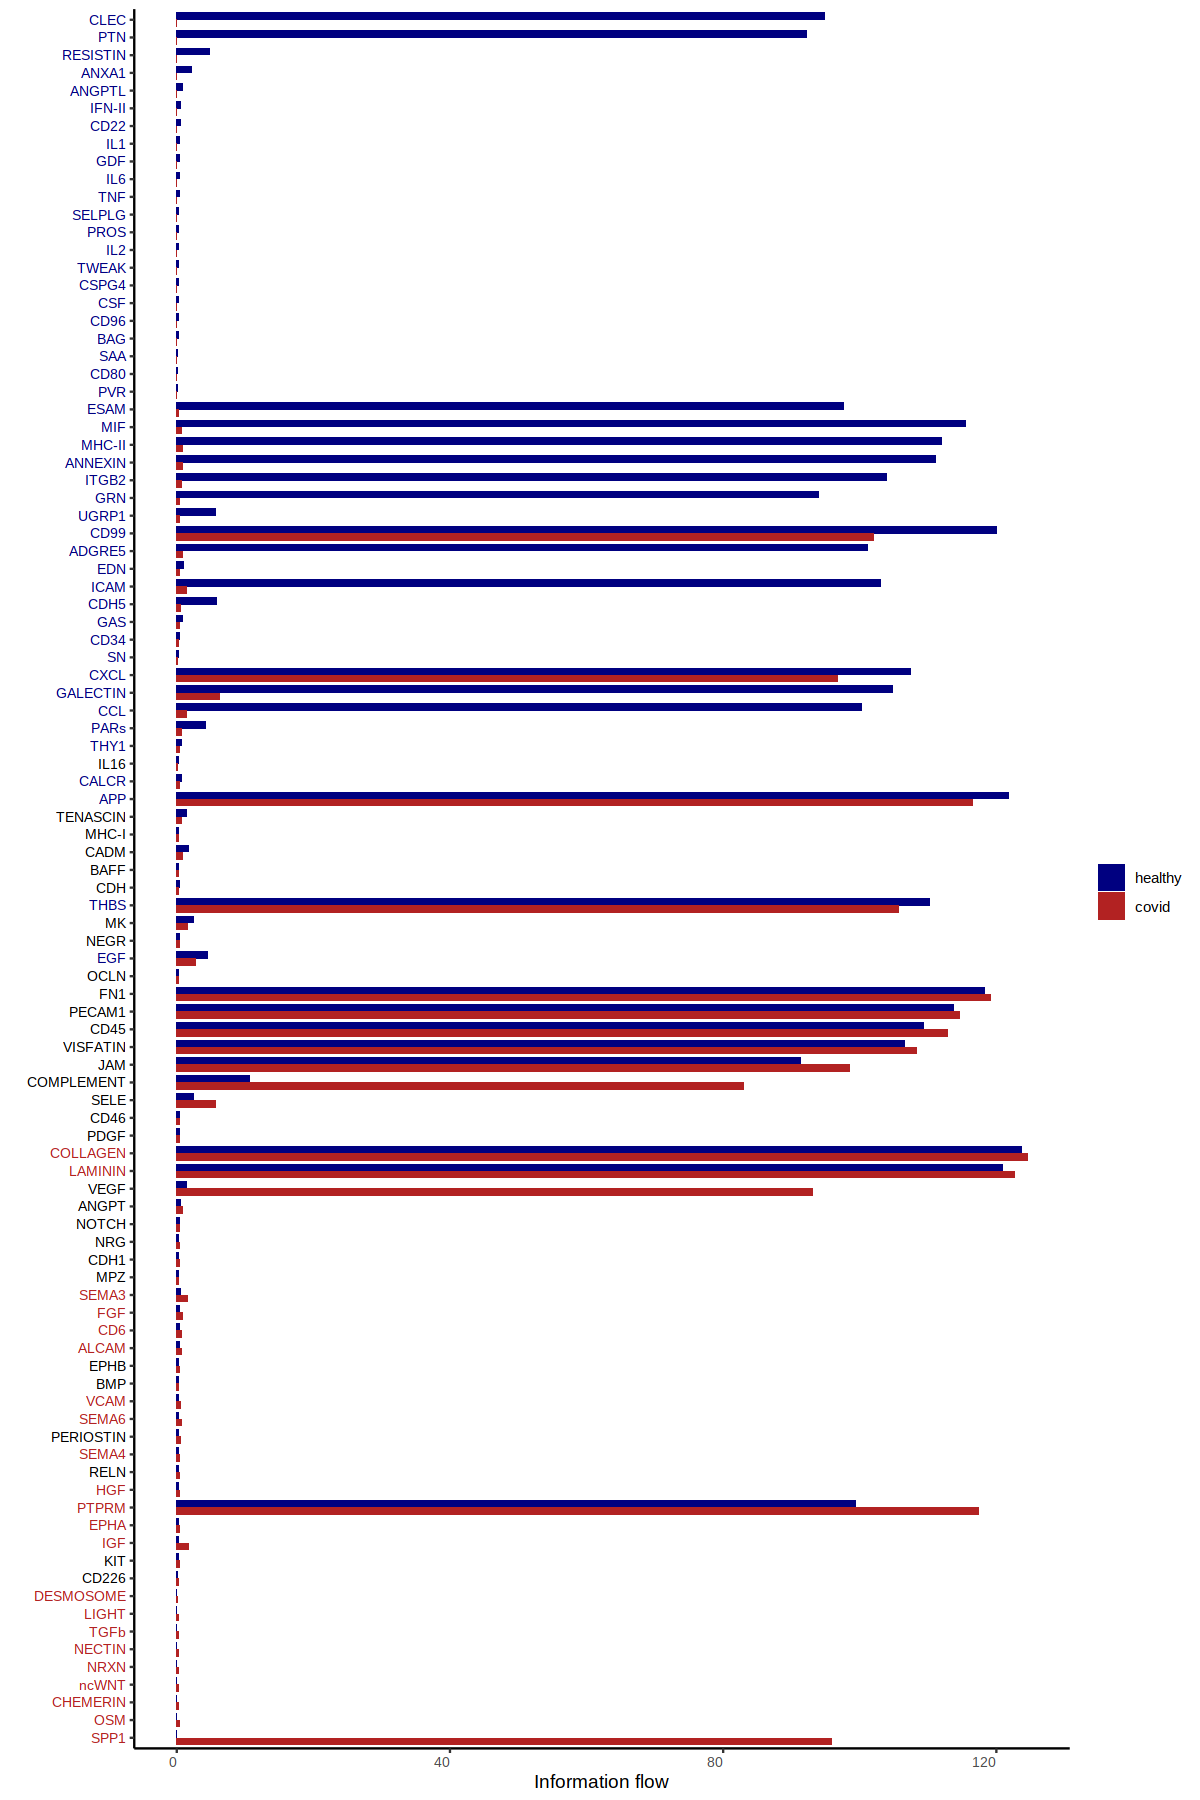

In [20]:
gg1

In [34]:
pdf("allpathways_waterfall.pdf", width = 5, height = 10)

gg1
dev.off()

png 
  2

In [44]:
cellchat.healthy

An object of class CellChat created from a single dataset 
 34091 genes.
 296754 cells.

In [14]:
cellchat.covid

An object of class CellChat created from a single dataset 
 34091 genes.
 218002 cells.

In [15]:
cellchat

An object of class CellChat created from a merged object with multiple datasets 
 895 signaling genes.
 514756 cells.

In [16]:
names(cellchat@net)

[1] "healthy" "covid"

In [21]:
genotypes <- names(cellchat@net)

### All States Heatmap

In [20]:

heatmap.df <- list(contrib = data.frame(matrix(ncol = 0, nrow = 0)), pval = data.frame(matrix(ncol = 0, nrow = 0)))

for (i in c(2:length(genotypes))){
  gg <- rankNet(cellchat, mode = "comparison", comparison=c(1,i)
                , title= genotypes[i]
                , cutoff.pvalue = 0.05
                , font.size = 100
                , stacked = T, show.raw = T, do.stat = TRUE, return.data = FALSE)
  temp <- data.frame(gg$data[gg$data$group == levels(gg$data$group)[1],c("contribution", "pvalues")], control.contribution=gg$data[gg$data$group == levels(gg$data$group)[2],c("contribution")], row.names = rownames(gg$data)[gg$data$group == levels(gg$data$group)[2]])
  temp2 <- data.frame((temp[,1]/temp[,3]), row.names = rownames(temp))
  colnames(temp2) <- genotypes[i]
  if(sum(dim(heatmap.df$contrib) == c(0,0))){
    heatmap.df$contrib <- temp2
  } else{
    heatmap.df$contrib <- merge(heatmap.df$contrib, temp2, all = TRUE, by = "row.names")
    rownames(heatmap.df$contrib) <- heatmap.df$contrib$Row.names
    heatmap.df$contrib <- heatmap.df$contrib[,c(-1)]
  }
  
  #temp2 <- data.frame(temp[,2], row.names = rownames(temp))
  temp2 <- data.frame(p.adjust(temp[,2], method="bonferroni"), row.names = rownames(temp))
  colnames(temp2) <- genotypes[i]
  if(sum(dim(heatmap.df$pval) == c(0,0))){
    heatmap.df$pval <- temp2
  } else {
    heatmap.df$pval <- merge(heatmap.df$pval, temp2, all = TRUE, by = "row.names")
    rownames(heatmap.df$pval) <- heatmap.df$pval$Row.names
    heatmap.df$pval <- heatmap.df$pval[,c(-1)]
  }
}

heatmap.df$contrib <- log2(heatmap.df$contrib)

heatmap.df$pval <- data.frame(sapply(heatmap.df$pval, as.numeric), row.names=rownames(heatmap.df$pval))
heatmap.df$contrib <- data.frame(sapply(heatmap.df$contrib, as.numeric), row.names=rownames(heatmap.df$contrib))




MAX.CONTRIB <- max(abs(heatmap.df$contrib[!(sapply(heatmap.df$contrib, is.infinite) | is.na(heatmap.df$contrib))]))
MAX.CONTRIB <- round(MAX.CONTRIB)
MAX.CONTRIB


INF.VALUE <- MAX.CONTRIB+1
INF.VALUE



[1] 8

[1] 9

In [22]:
pdf("allpathways_heatmap_no_abundance_Feb23.pdf", width = 10, height = 5)


options(repr.plot.width = 12, repr.plot.height = 5)



heatmap.df2 <- heatmap.df



heatmap.df2$contrib[sapply(heatmap.df2$contrib, is.infinite) & heatmap.df2$contrib > 0] <- INF.VALUE
heatmap.df2$contrib[sapply(heatmap.df2$contrib, is.infinite) & heatmap.df2$contrib < 0] <- -INF.VALUE



if(length(genotypes) > 2){
heatmap.df2$pval[is.na(heatmap.df2$pval)] <- 2



heatmap.df2$pval <- heatmap.df2$pval[(apply(is.na(heatmap.df2$contrib), 1, sum) < 5),]
heatmap.df2$contrib <- heatmap.df2$contrib[(apply(is.na(heatmap.df2$contrib), 1, sum) < 5),]



heatmap.df2$contrib <- heatmap.df2$contrib[(apply(heatmap.df2$pval > 0.01, 1, sum) < 5),]
heatmap.df2$pval <- heatmap.df2$pval[(apply(heatmap.df2$pval > 0.01, 1, sum) < 5),]
heatmap.df2$pval[heatmap.df2$pval == 2] <- NA



}



heatmap.df2$sig <- heatmap.df2$pval
heatmap.df2$sig[] <- ''
heatmap.df2$sig[heatmap.df2$pval < 0.05] <- '*'
heatmap.df2$sig[is.na(heatmap.df2$pval)] <- '-'



heatmap.df2$contrib[is.na(heatmap.df2$contrib)] <- 0



scale.interval.size <- 0.05
num_breaks <- (MAX.CONTRIB * 2 / scale.interval.size)+1
breaks <- c(-(INF.VALUE+1), seq(from=-MAX.CONTRIB, to=MAX.CONTRIB, length.out=num_breaks), INF.VALUE+1)
midpoint <- 0 # the mid of the "real" scale



rampCol2 <- colorRampPalette(c("#6699FF", "white", "#b90e0a"))(length(breaks)-1)
mypalette <- c(rampCol2)
mypalette[1] <- "#5689EF" # just a random extreme color for -inf
mypalette[num_breaks+1] <- "#b90e0a" # just a random extreme color for inf



if(length(genotypes) > 2){

heatmap.df3 <- heatmap.df2
heatmap.df4 <- heatmap.df2



heatmap.df3$contrib <- heatmap.df2$contrib[(apply(heatmap.df2$contrib > 0 & heatmap.df2$sig != '', 1, sum) >=4 & apply(heatmap.df2$contrib < 0 & heatmap.df2$sig != '', 1, sum) == 0)
|(apply(heatmap.df2$contrib < 0 & heatmap.df2$sig != '', 1, sum) >=4 & apply(heatmap.df2$contrib > 0 & heatmap.df2$sig != '', 1, sum) == 0) ,]
heatmap.df3$sig <- heatmap.df2$sig[(apply(heatmap.df2$contrib > 0 & heatmap.df2$sig != '', 1, sum) >=4 & apply(heatmap.df2$contrib < 0 & heatmap.df2$sig != '', 1, sum) == 0)
|(apply(heatmap.df2$contrib < 0 & heatmap.df2$sig != '', 1, sum) >=4 & apply(heatmap.df2$contrib > 0 & heatmap.df2$sig != '', 1, sum) == 0) ,]
heatmap.df3$sig <- heatmap.df3$sig[order(apply(heatmap.df3$contrib, 1, mean)),]
heatmap.df3$contrib <- heatmap.df3$contrib[order(apply(heatmap.df3$contrib, 1, mean)),]



heatmap.df4$contrib <- heatmap.df2$contrib[!((apply(heatmap.df2$contrib > 0 & heatmap.df2$sig != '', 1, sum) >=4 & apply(heatmap.df2$contrib < 0 & heatmap.df2$sig != '', 1, sum) == 0)
|(apply(heatmap.df2$contrib < 0 & heatmap.df2$sig != '', 1, sum) >=4 & apply(heatmap.df2$contrib > 0 & heatmap.df2$sig != '', 1, sum) == 0)) ,]
heatmap.df4$sig <- heatmap.df2$sig[!((apply(heatmap.df2$contrib > 0 & heatmap.df2$sig != '', 1, sum) >=4 & apply(heatmap.df2$contrib < 0 & heatmap.df2$sig != '', 1, sum) == 0)
|(apply(heatmap.df2$contrib < 0 & heatmap.df2$sig != '', 1, sum) >=4 & apply(heatmap.df2$contrib > 0 & heatmap.df2$sig != '', 1, sum) == 0)) ,]



heatmap.df4$contrib <- heatmap.df4$contrib[with(data.frame(heatmap.df4$sig == '*'), order(-LMNA.LV,-TTN.LV,-RBM20.LV,-PKP2.LV,-PVneg.LV)),]
heatmap.df4$sig <- heatmap.df4$sig[with(data.frame(heatmap.df4$sig == '*'), order(-LMNA.LV,-TTN.LV,-RBM20.LV,-PKP2.LV,-PVneg.LV)),]



heatmap.df4$change <- heatmap.df4$contrib
heatmap.df4$change[] <- 0
heatmap.df4$change[heatmap.df4$contrib > 0 & heatmap.df4$sig != ''] <- 1
heatmap.df4$change[heatmap.df4$contrib < 0 & heatmap.df4$sig != ''] <- -1
heatmap.df4$sig <- heatmap.df4$sig[order(apply(heatmap.df4$change, 1, sum), decreasing = TRUE),]
heatmap.df4$contrib <- heatmap.df4$contrib[order(apply(heatmap.df4$change, 1, sum), decreasing = TRUE),]



heatmap.df4$contrib <- heatmap.df4$contrib[order(apply(heatmap.df4$sig == '*', 1, sum)),]
heatmap.df4$sig <- heatmap.df4$sig[order(apply(heatmap.df4$sig == '*', 1, sum)),]




heatmap.2(t(heatmap.df3$contrib)
, col=mypalette
, Rowv=NULL
, Colv=NULL
, dendrogram="none"
, na.rm = TRUE
, breaks=breaks, density.info="none", trace="none"
, symm=F,symkey=F,symbreaks=T, scale="none"
, margins = c(5,10)
, lhei=c(2,4), lwid=c(1,6)
, cellnote = t(heatmap.df3$sig)
,notecex=2.0
,notecol="black"
,keysize=5
,cexRow = 2

)



heatmap.2(t(heatmap.df4$contrib)
, col=mypalette
, Rowv=NULL
, Colv=NULL
, dendrogram="none"
, na.rm = TRUE
, breaks=breaks, density.info="none", trace="none"
, symm=F,symkey=F,symbreaks=T, scale="none"
, margins = c(5,10)
, lhei=c(2,4), lwid=c(1,6)
, cellnote = t(heatmap.df4$sig)
,notecex=2.0
,notecol="black"
,keysize=5
,cexRow = 2
)
} else {
heatmap.df3 <- heatmap.df2
heatmap.df3$contrib <- heatmap.df3$contrib[heatmap.df2$pval < 0.05, ,drop=FALSE]
heatmap.df3$pval <- heatmap.df3$pval[heatmap.df2$pval < 0.05, ,drop=FALSE]
heatmap.df3$sig <- heatmap.df3$sig[heatmap.df2$pval < 0.05, ,drop=FALSE]

heatmap.2(t(cbind(heatmap.df3$contrib, heatmap.df3$contrib))
, col=mypalette
, Rowv=NULL
, Colv=NULL
, dendrogram="none"
, na.rm = TRUE
, breaks=breaks, density.info="none", trace="none"
, symm=F,symkey=F,symbreaks=T, scale="none"
, margins = c(8,10)
, lhei=c(2,4), lwid=c(1,6)
, cellnote = t(cbind(heatmap.df3$sig, heatmap.df3$sig))
,notecex=2.0
,notecol="black"
)
}

dev.off()

png 
  2

### All Pathways

In [23]:
a=netVisual_bubble_2(cellchat
, thresh = 0.05
, comparison = c(1, 2)
, angle.x = 45
,text_size.y=6,pch=20,color.heatmap="Spectral",direction=-1,grid.on=FALSE,line.on=FALSE, color.text.use=FALSE,order=TRUE, return.data=TRUE)

write.csv(a$communication,"All_Pathways_no_abundance.csv")

Comparing communications on a merged object 


